In [1]:
%pylab notebook 

Populating the interactive namespace from numpy and matplotlib


In [2]:
from pleque.io import _geqdsk as eqdsktool 
from pleque.io._readers import read_eqdsk
from pleque.utils.plotting import *
from pleque import Equilibrium
from test.testing_utils import get_test_equilibria_filenames, load_testing_equilibrium




In [49]:
#plt.style.available
plt.style.use('seaborn-talk')

In [50]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [76]:
def save_it(name, v=1):
    file_dir = '/compass/home/kripner/konference/2018_PhdEvent/fig/'
    savefig(file_dir +  name +'_v' + str(v) + '.png')
    savefig(file_dir +  name +'_v' + str(v) + '.pdf')
    

In [51]:
gfiles = get_test_equilibria_filenames()
gfiles

['/compass/home/kripner/Projects/equilibrium_module/test/test_files/baseline_eqdsk',
 '/compass/home/kripner/Projects/equilibrium_module/test/test_files/scenario_1_baseline_upward_eqdsk',
 '/compass/home/kripner/Projects/equilibrium_module/test/test_files/DoubleNull_eqdsk',
 '/compass/home/kripner/Projects/equilibrium_module/test/test_files/g13127.1050',
 '/compass/home/kripner/Projects/equilibrium_module/test/test_files/_Equidisk_File__15MA_T_ped_4.5keV_513x51_44WYKU_v1_0.txt',
 '/compass/home/kripner/Projects/equilibrium_module/test/test_files/14068@1130_2kA_modified_triang.gfile',
 '/compass/home/kripner/Projects/equilibrium_module/test/test_files/g15349.1120']

  nx = 65, ny = 129
197 1
--- No limiter specified. The IBA v3.1 limiter will be used.
---------------------------------
Equilibrium module initialization
---------------------------------
--- Generate 2D spline ---
--- Looking for extremes ---


<IPython.core.display.Javascript object>


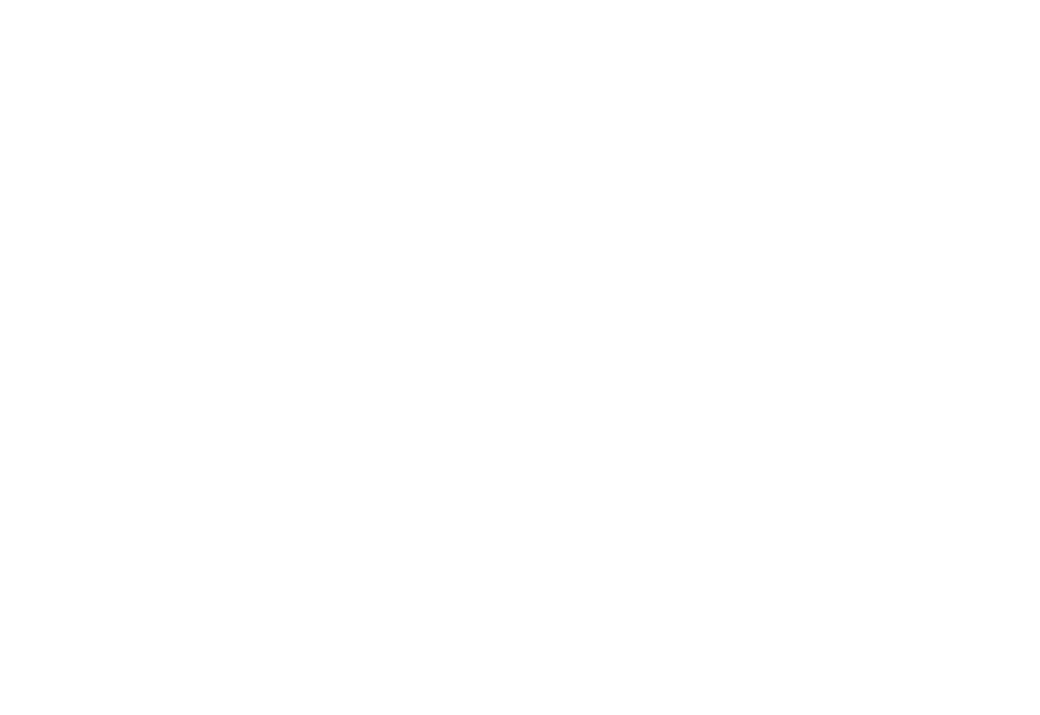

>>> lower x-point configuration found
--- Generate 1D splines ---
--- Mapping midplane to psi_n ---
--- Mapping pressure and f func to psi_n ---


In [52]:
eq = load_testing_equilibrium()

In [53]:
g = eq.grid(resolution=[1e-3, 1e-3])
g.psi.shape

(2000, 950)

  nx = 33, ny = 33
361 231
---------------------------------
Equilibrium module initialization
---------------------------------
--- Generate 2D spline ---
--- Looking for extremes ---


/compass/home/kripner/Projects/equilibrium_module/pleque/core.py:833: RuntimeWarning: invalid value encountered in true_divide
  op_psiscale = 1 + (op_psiscale - np.min(op_psiscale)) / (np.max(op_psiscale) - np.min(op_psiscale))
/sw/python2/anaconda3.5/lib/python3.5/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


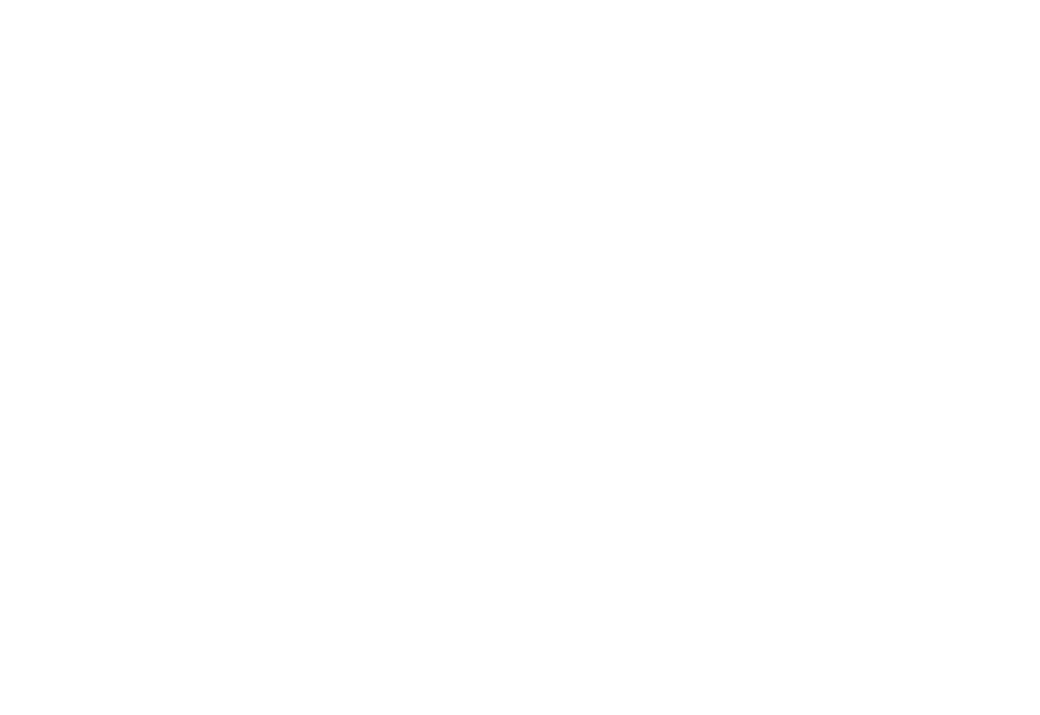

>>> lower x-point configuration found
--- Generate 1D splines ---
--- Mapping midplane to psi_n ---
--- Mapping pressure and f func to psi_n ---
  nx = 513, ny = 513
1035 59
---------------------------------
Equilibrium module initialization
---------------------------------
--- Generate 2D spline ---
--- Looking for extremes ---


<IPython.core.display.Javascript object>


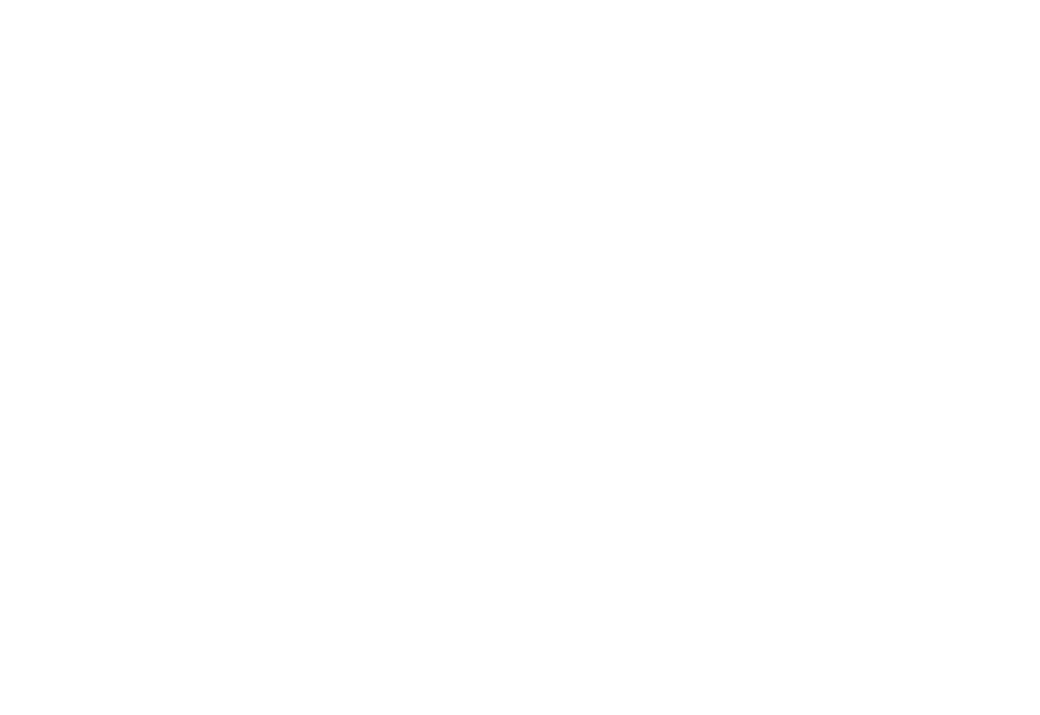

>>> lower x-point configuration found
--- Generate 1D splines ---
--- Mapping midplane to psi_n ---
--- Mapping pressure and f func to psi_n ---
  nx = 33, ny = 33
361 231


<IPython.core.display.Javascript object>


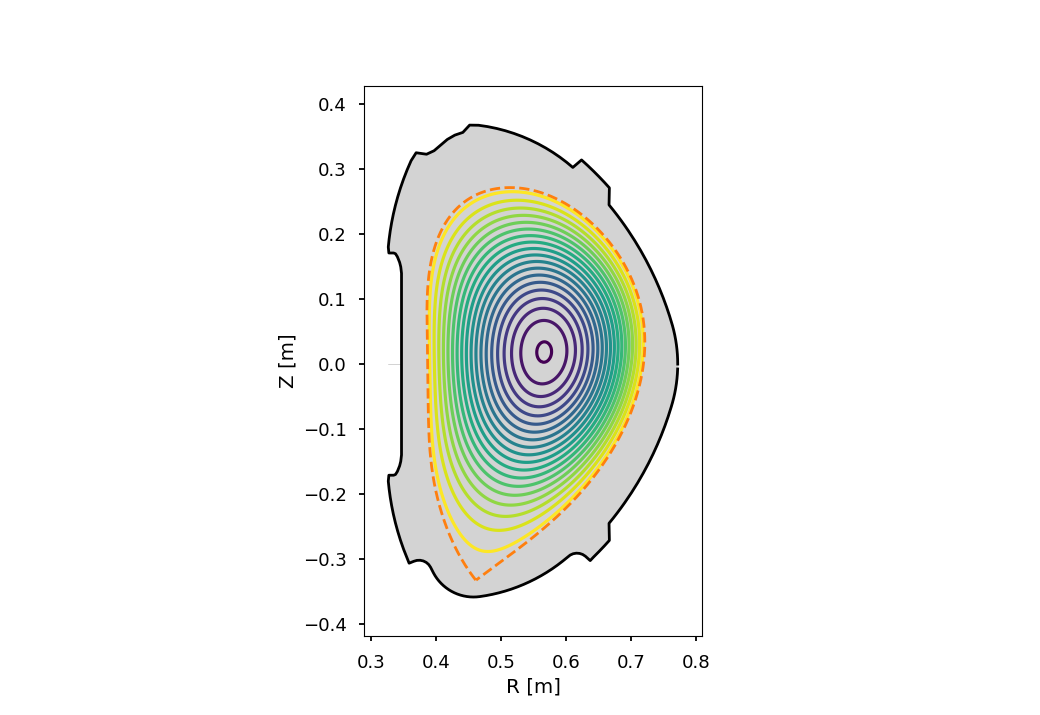

/sw/python2/anaconda3.5/lib/python3.5/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


In [78]:
# first three files are fiesta and may cause some troubles
Npl = 6

eq = read_eqdsk(gfiles[Npl])

eq_iter = read_eqdsk(gfiles[4])
with open(gfiles[Npl], 'r') as f:
    eq_efit = eqdsktool.read(f)
eq_efit.keys()

plt.figure()
eq._plot_overview()
save_it('overview', 1)

In [ ]:
plt.figure()
eq._plot_overview()
plot_extremes(eq)



/sw/python2/anaconda3.5/lib/python3.5/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


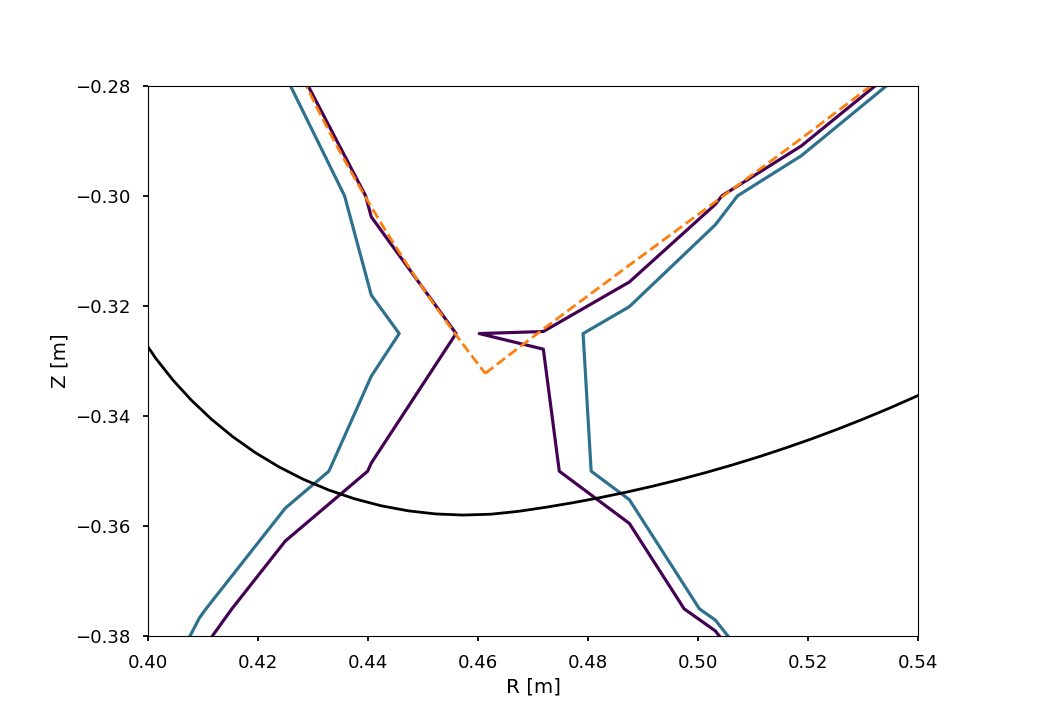

In [84]:
#gfile

r_axis = np.linspace(eq_efit["rleft"], eq_efit["rleft"] + eq_efit["rdim"], eq_efit["nx"])
z_axis = np.linspace(eq_efit["zmid"] - eq_efit["zdim"] / 2, eq_efit["zmid"] + eq_efit["zdim"] / 2, eq_efit["ny"])

plt.figure()
ax = plt.gca()
ax.plot(eq_efit['rlim'], eq_efit['zlim'], color='k', lw=2)
ax.plot(eq_efit['rbdry'], eq_efit['zbdry'], 'C1--', lw=2)
ax.contour(r_axis, z_axis, eq_efit['psi'].T, 20)
ax.contour(r_axis, z_axis, eq_efit['psi'].T, [eq_efit['sibdry']])
ax.set_xlabel('R [m]')
ax.set_ylabel('Z [m]')
ax.set_aspect('equal')
ax.set_xlim(0.4, 0.54)
ax.set_ylim(-.38, -.28)

save_it('gfile', 2)

/sw/python2/anaconda3.5/lib/python3.5/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


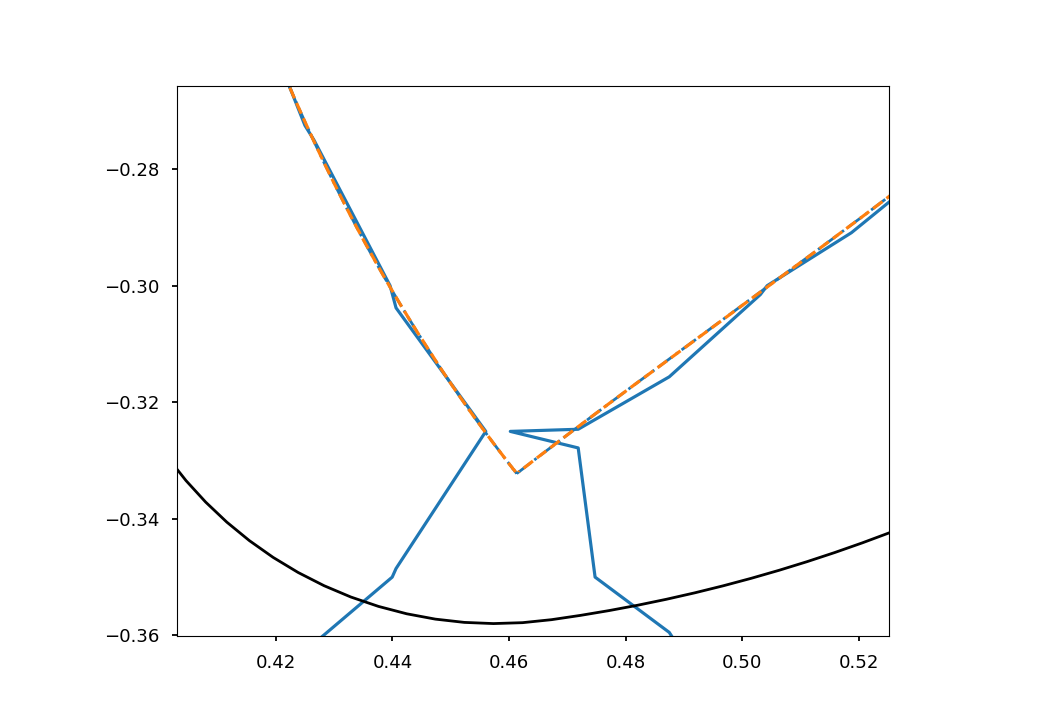

In [88]:
plt.figure()
ax = plt.gca()
ax.plot(eq_efit['rlim'], eq_efit['zlim'], color='k', lw=2)
ax.plot(eq_efit['rbdry'], eq_efit['zbdry'], 'C0-.', lw=2)
ax.contour(r_axis, z_axis, eq_efit['psi'].T, [eq_efit['sibdry']], colors='C0')

eq.lcfs.plot(color='C1', ls='--')
ax.plot(eq._x_point[0], eq._x_point[1], 'C1+', lw=3)

ax.set_aspect('equal')
#ax.set_xlim((5.06, 5.09))
#ax.set_ylim((-3.45, -3.43))


## q-profile

<IPython.core.display.Javascript object>


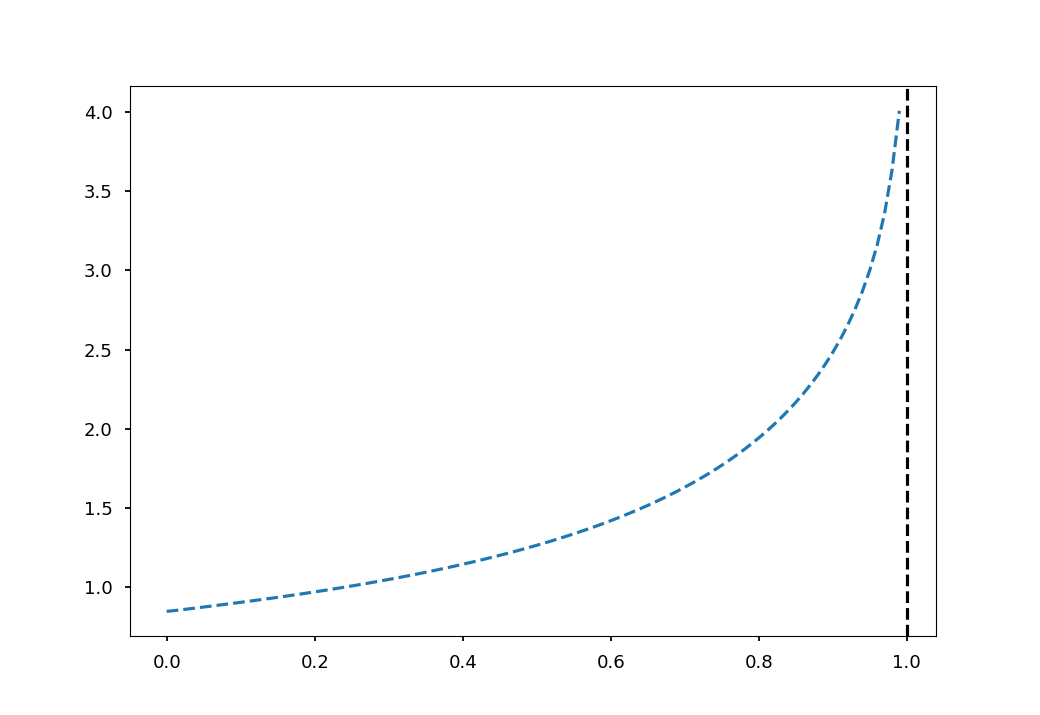

In [103]:
plt.close('all')

# q profiles

psi_n = np.linspace(0, 1, 100, endpoint=False)
    
plt.figure()

plt.plot(psi_n, np.abs(eq.q(psi_n=psi_n)), '--')
plt.axvline(1, ls='--', color='k')



In [104]:
def plot_2d(R, Z, data, *args, title=None):
    
    rlim = [np.min(eq.first_wall.R), np.max(eq.first_wall.R)]
    zlim = [np.min(eq.first_wall.Z), np.max(eq.first_wall.Z)]

    size = rlim[1] - rlim[0]
    rlim[0] -= size / 12
    rlim[1] += size / 12

    size = zlim[1] - zlim[0]
    zlim[0] -= size / 12
    zlim[1] += size / 12
    
    plt.figure()    
    ax = plt.gca()
    
    ax.set_xlim(rlim)
    ax.set_ylim(zlim)
    
    ax.plot(eq.lcfs.R, eq.lcfs.Z, color='k', ls='--', lw=2)
    ax.plot(eq.first_wall.R, eq.first_wall.Z, 'k-', lw=2)
    ax.set_xlabel('R [m]')
    ax.set_ylabel('Z [m]')
    

    ax.set_aspect('equal')
    
    cl = ax.contour(R, Z, data, *args)
    
    if title is not None:
        ax.set_title(title)
        
    return cl

<IPython.core.display.Javascript object>


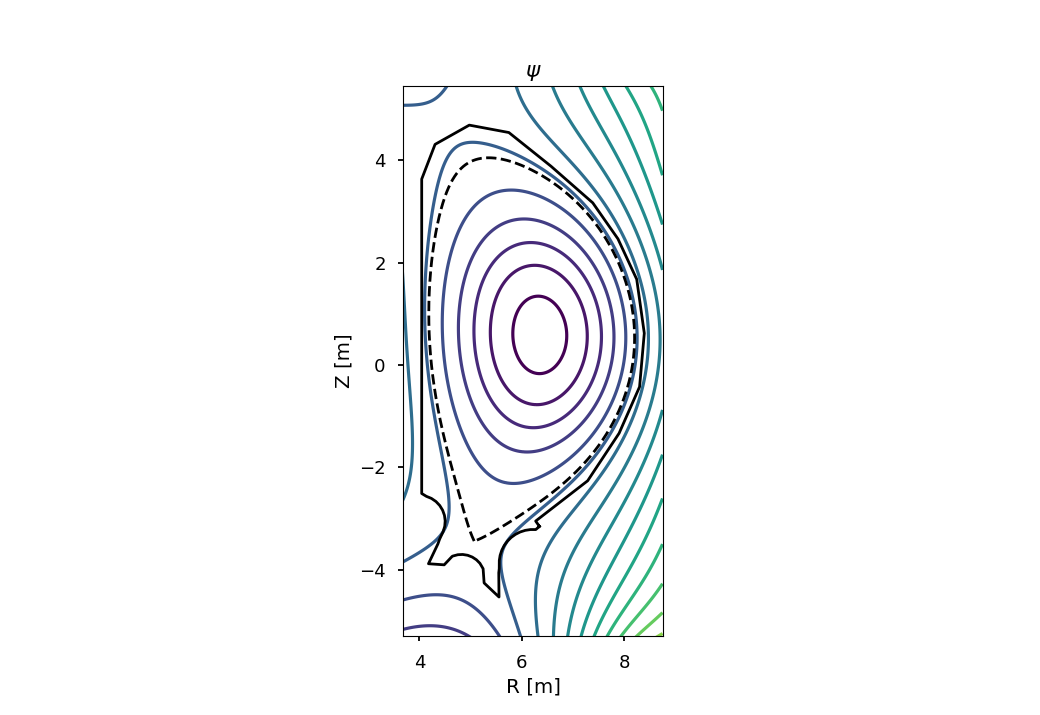

<IPython.core.display.Javascript object>


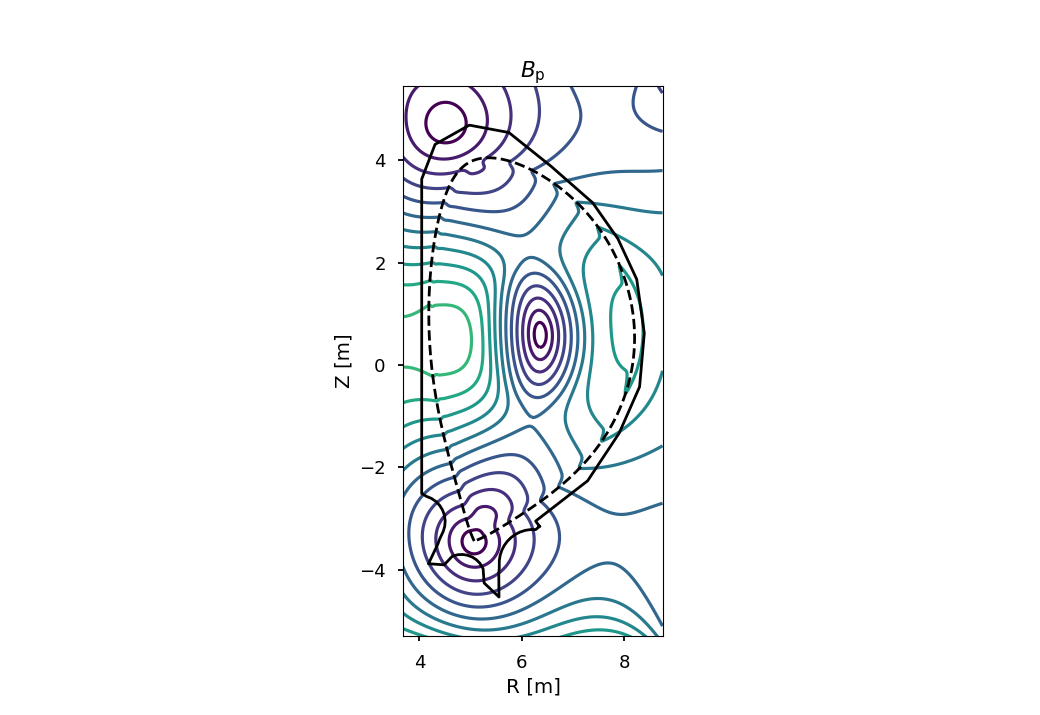

<IPython.core.display.Javascript object>


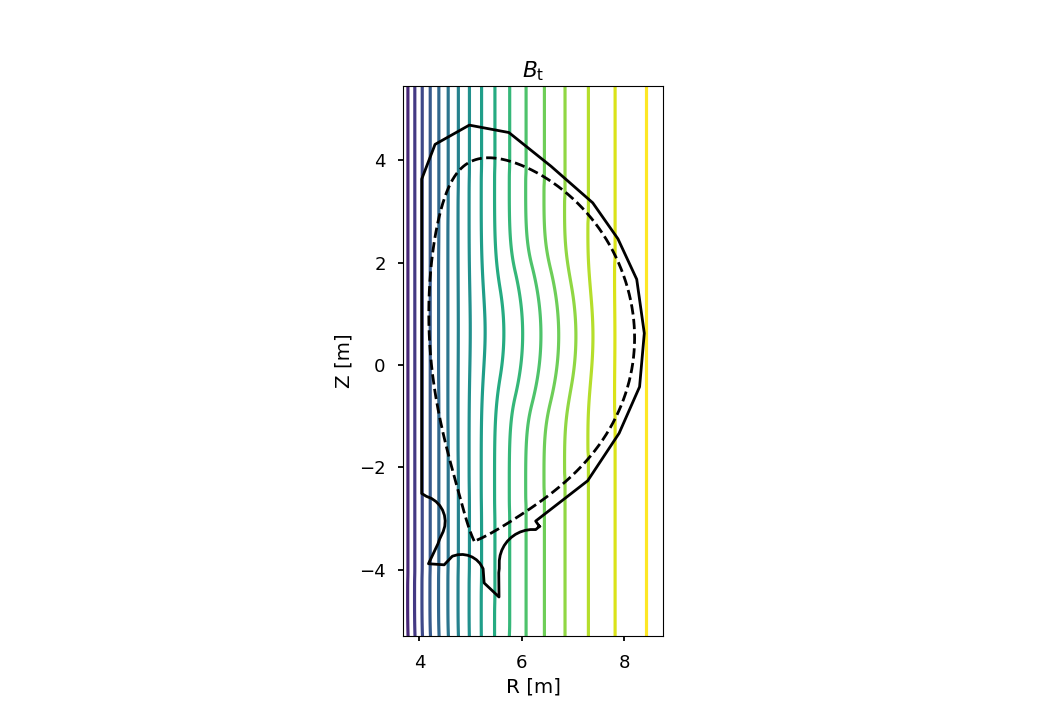

<IPython.core.display.Javascript object>


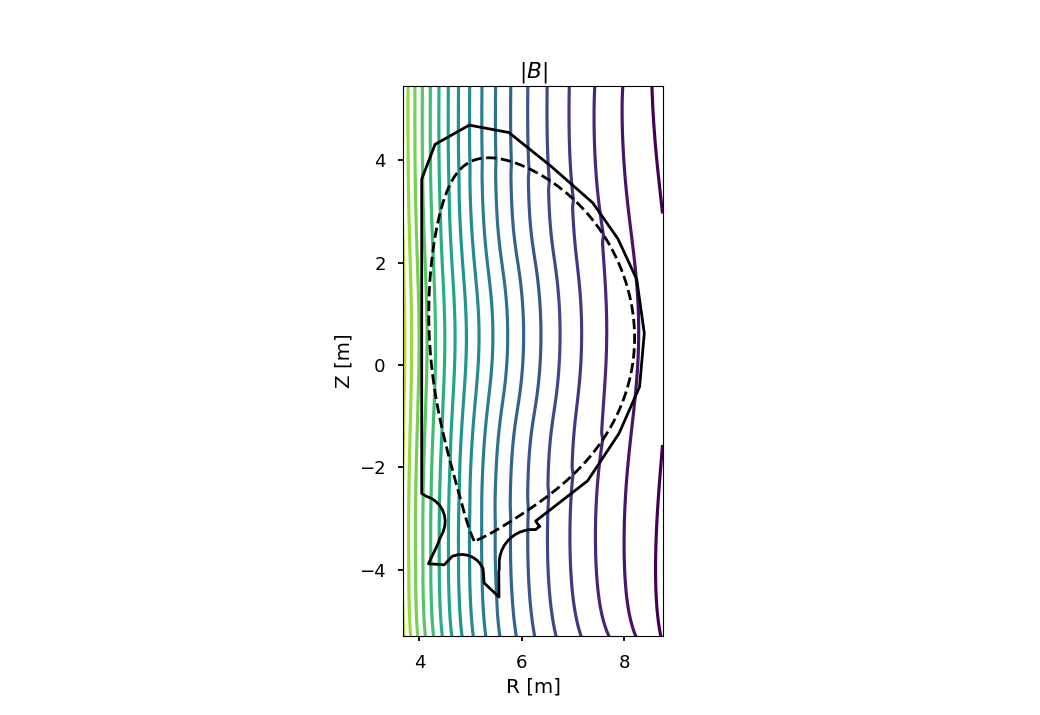

<IPython.core.display.Javascript object>


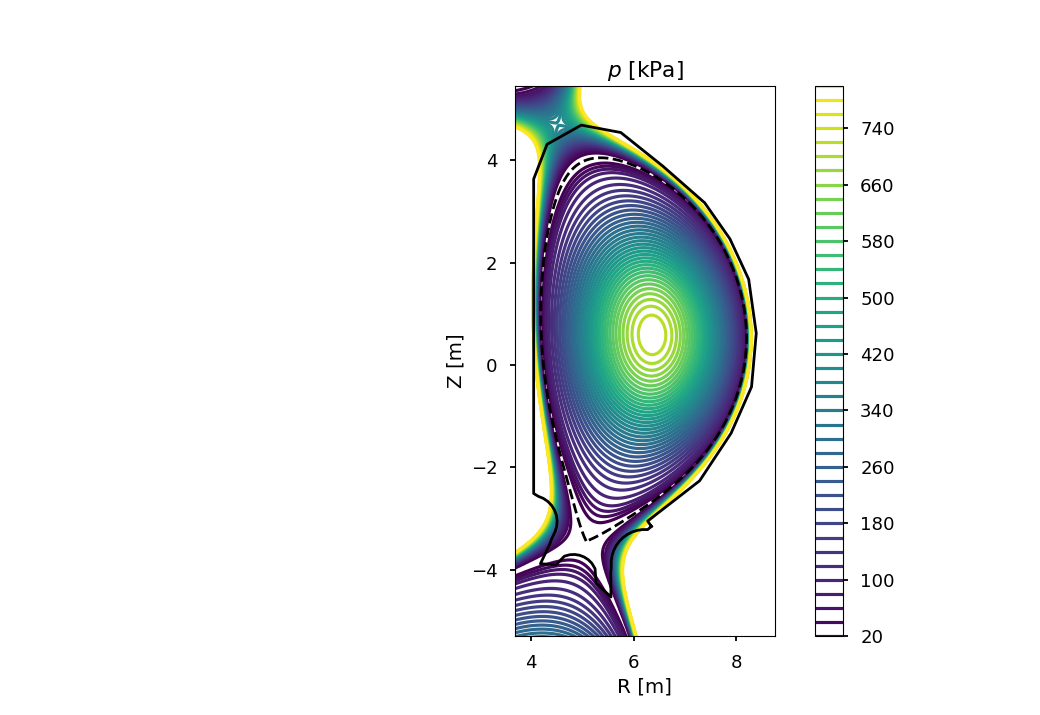

<IPython.core.display.Javascript object>


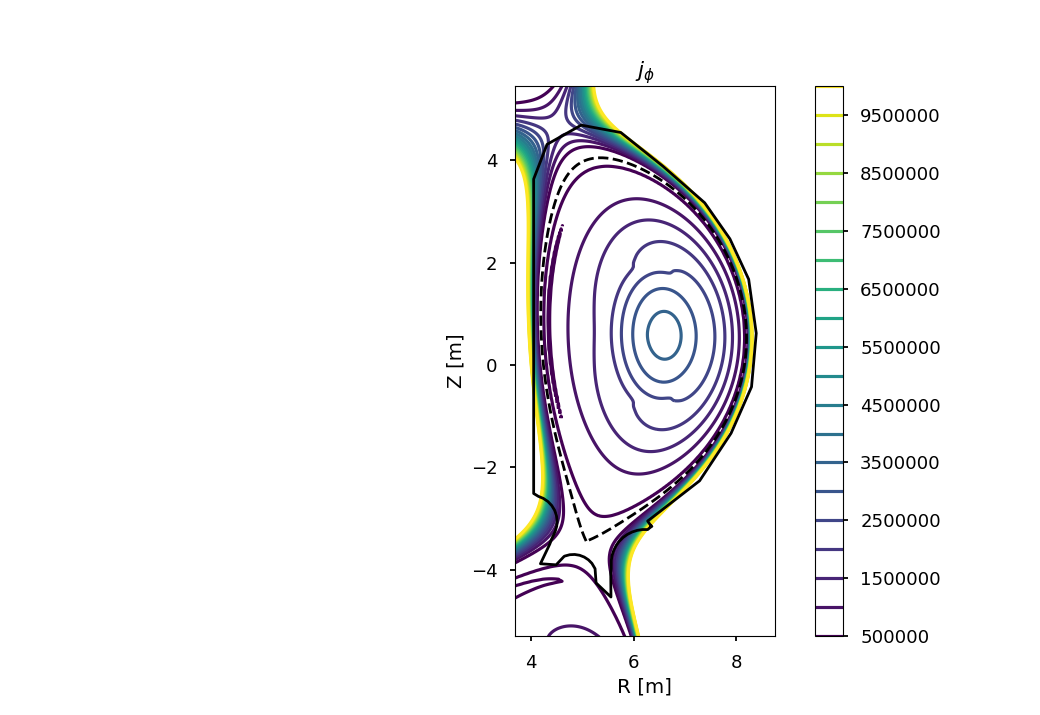

<IPython.core.display.Javascript object>


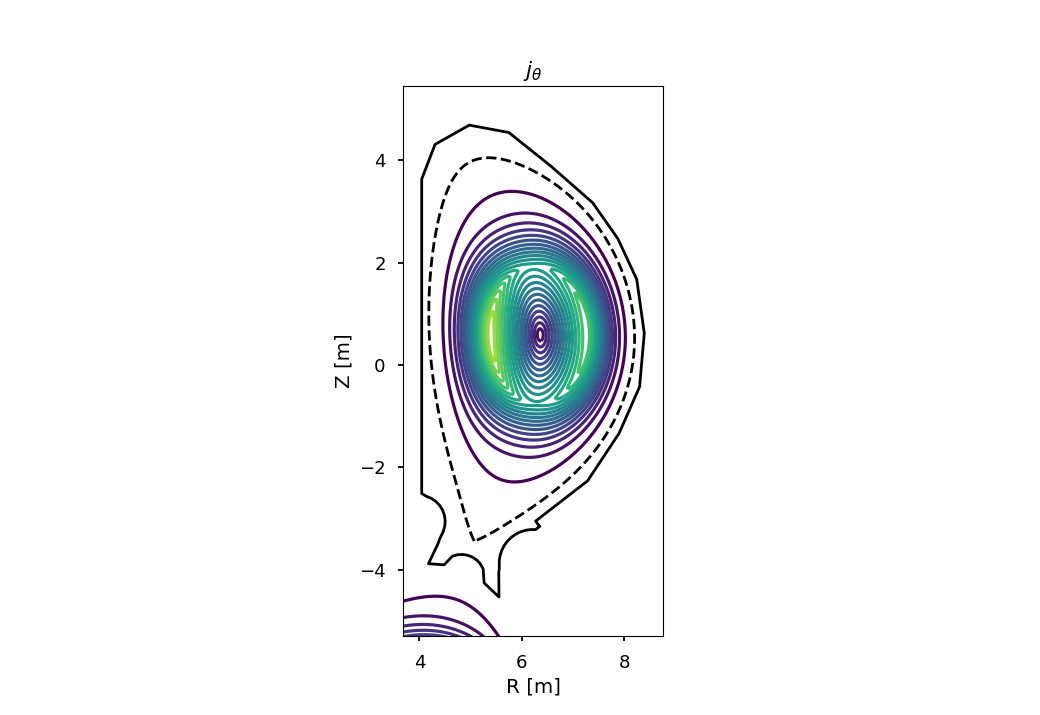

1.0204081632653061%
2.0408163265306123%
3.061224489795918%
4.081632653061225%
5.1020408163265305%
6.122448979591837%
7.142857142857142%
8.16326530612245%
9.183673469387756%
10.20408163265306%
11.224489795918368%
12.244897959183673%
13.26530612244898%
14.285714285714288%
15.306122448979595%
16.3265306122449%
17.346938775510207%
18.367346938775515%
19.387755102040817%
20.408163265306122%
21.42857142857143%
22.448979591836736%
23.46938775510204%
24.48979591836735%
25.510204081632654%
26.53061224489796%
27.551020408163268%
28.571428571428577%
29.59183673469388%
30.612244897959183%
31.63265306122449%
32.6530612244898%
33.673469387755105%
34.693877551020414%
35.71428571428572%
36.73469387755103%
37.755102040816325%
38.775510204081634%
39.795918367346935%
40.816326530612244%
41.83673469387755%
42.85714285714286%
43.87755102040816%
44.89795918367347%
45.91836734693878%
46.93877551020408%
47.95918367346939%
48.9795918367347%
50.0%
51.02040816326531%
52.04081632653062%
53.06122448979592%
54.0816

91.83673469387756%
92.85714285714286%
93.87755102040816%
94.89795918367348%
95.91836734693878%
96.9387755102041%
97.9591836734694%
98.9795918367347%
100.0%


<IPython.core.display.Javascript object>


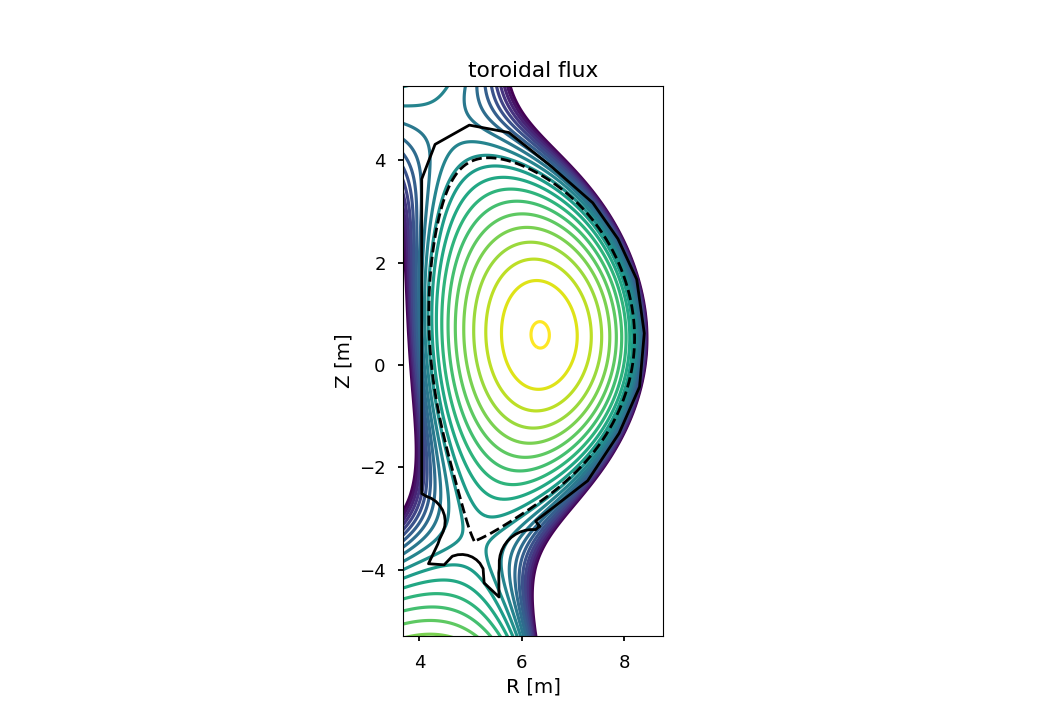

In [105]:
eq = eq_iter
grid = eq.grid((200,300),dim='size')

plot_2d(grid.R, grid.Z, grid.psi, 20, title=r'$\psi$')
save_it('tok_psi', 2)
plot_2d(grid.R, grid.Z, eq.B_pol(grid), 20, title=r'$B_\mathrm{p}$')
save_it('tok_Bp', 2)
plot_2d(grid.R, grid.Z, eq.B_tor(grid), 20, title=r'$B_\mathrm{t}$')
save_it('tok_Bt', 2)
plot_2d(grid.R, grid.Z, eq.B_abs(grid), 20, title=r'$|B|$')
save_it('tok_Babs', 2)
cl = plot_2d(grid.R, grid.Z, eq.pressure(grid)/1e3, np.linspace(0, 8e5/1e3, 41), title=r'$p$ [kPa]')
plt.colorbar(cl)
save_it('tok_press', 2)
cl = plot_2d(grid.R, grid.Z, eq.j_tor(grid), np.linspace(0, 1e7, 21), title=r'$j_\phi$')
plt.colorbar(cl)
save_it('tok_jphi', 2)
cl = plot_2d(grid.R, grid.Z, eq.j_pol(grid), np.linspace(0, 3e5, 21), title=r'$j_\theta$')
save_it('tok_jtheta', 2)
cl = plot_2d(grid.R, grid.Z, eq.tor_flux(grid), np.linspace(-40, 0, 21), title='toroidal flux')
save_it('tok_tor_flux', 2)
#plt.colorbar(cl)


## FluxSurfaces

<IPython.core.display.Javascript object>


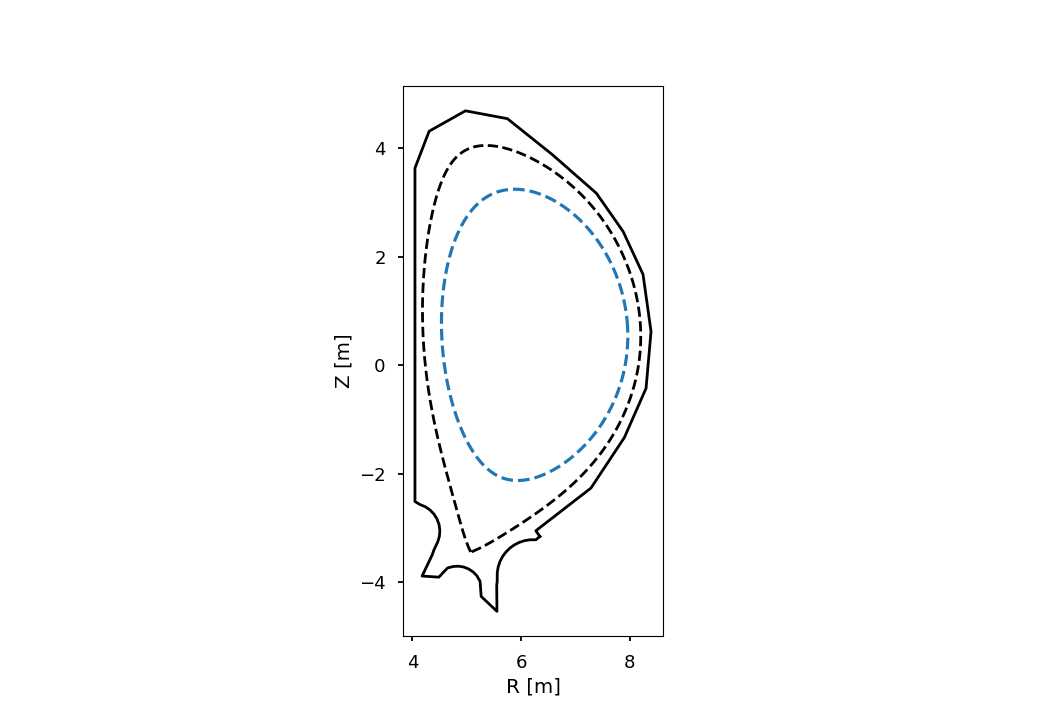

{'area': 14.311638142524348,
 'current': 13.000279670184989,
 'length': 13.973753170736375,
 'q': array([-1.99901063]),
 'volume': 554.01117642953955}

In [106]:
surf = eq._flux_surface(psi_n=0.8)[0]

plt.figure()
ax = gca()
ax.plot(eq.lcfs.R, eq.lcfs.Z, color='k', ls='--', lw=2)
ax.plot(eq.first_wall.R, eq.first_wall.Z, 'k-', lw=2)

surf.plot(ls='--')

ax.set_xlabel('R [m]')
ax.set_ylabel('Z [m]')

ax.set_aspect('equal')

save_it('flux_surf', 2)

l = dict(q=surf.eval_q, 
         length=surf.length,
         area=surf.area,
         volume=surf.volume,
         current=surf.tor_current/1e6)
l

## Profile mappings: 

  nx = 129, ny = 129
299 181
---------------------------------
Equilibrium module initialization
---------------------------------
--- Generate 2D spline ---
--- Looking for extremes ---


<IPython.core.display.Javascript object>


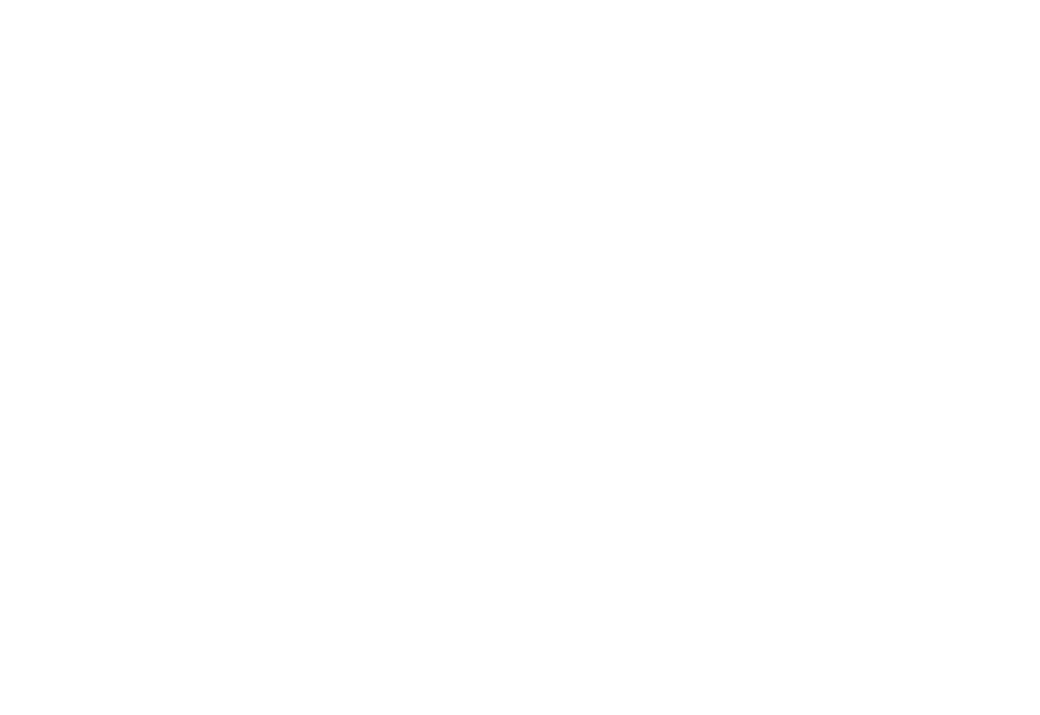

>>> lower x-point configuration found
--- Generate 1D splines ---
--- Mapping midplane to psi_n ---
--- Mapping pressure and f func to psi_n ---


In [107]:
eq = read_eqdsk(gfiles[5])

<IPython.core.display.Javascript object>


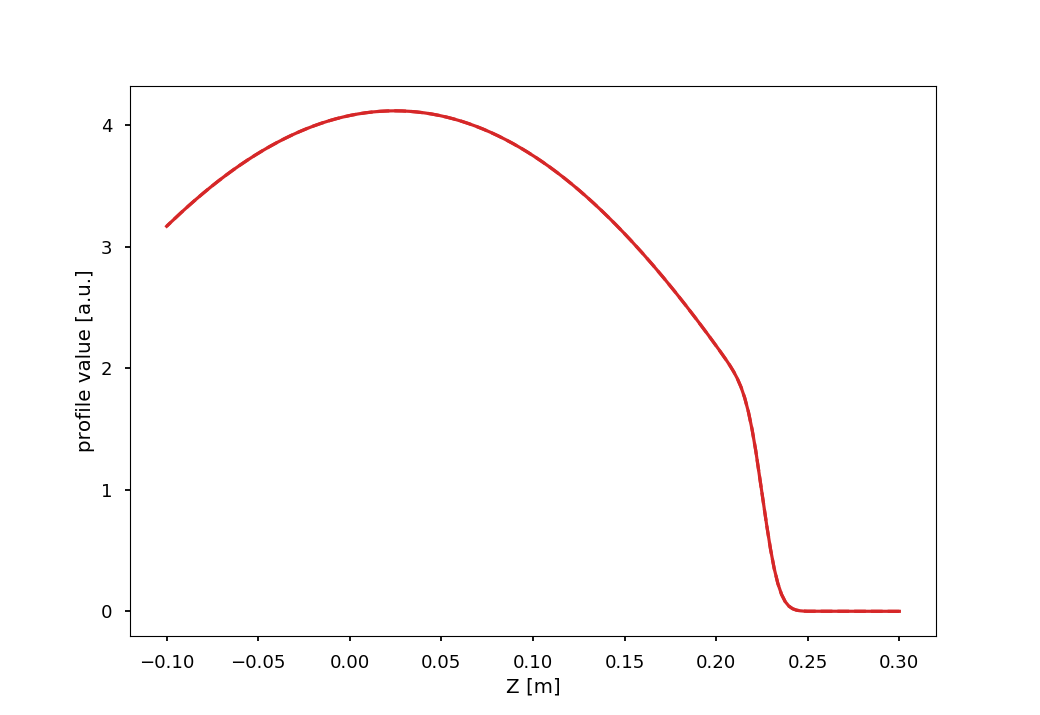

<IPython.core.display.Javascript object>


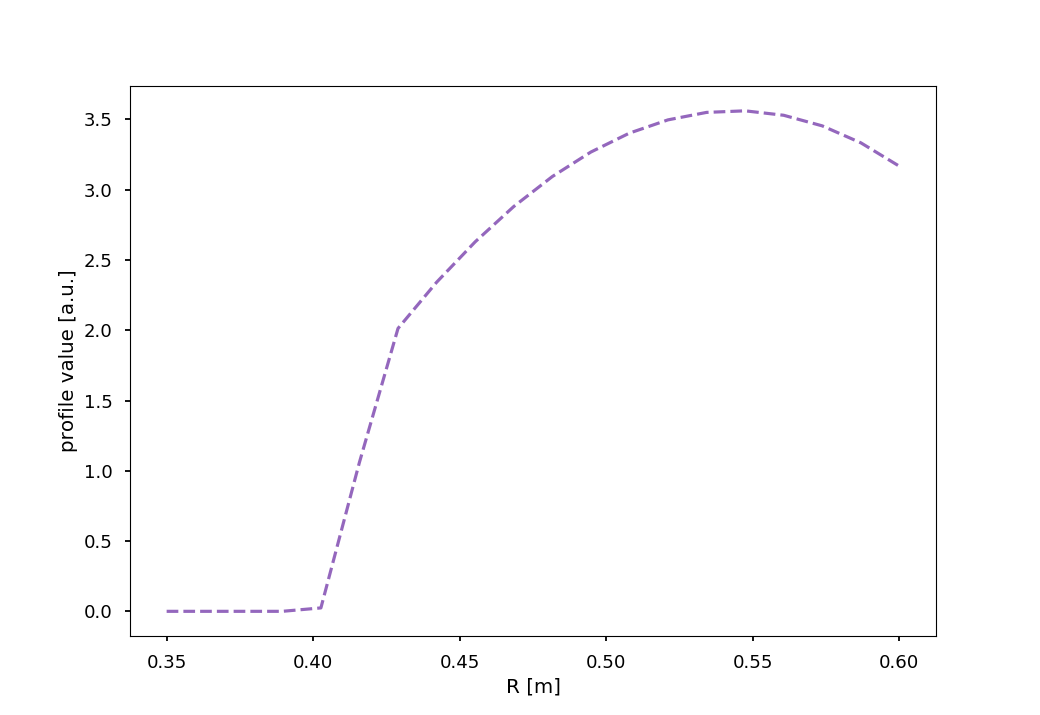

<IPython.core.display.Javascript object>


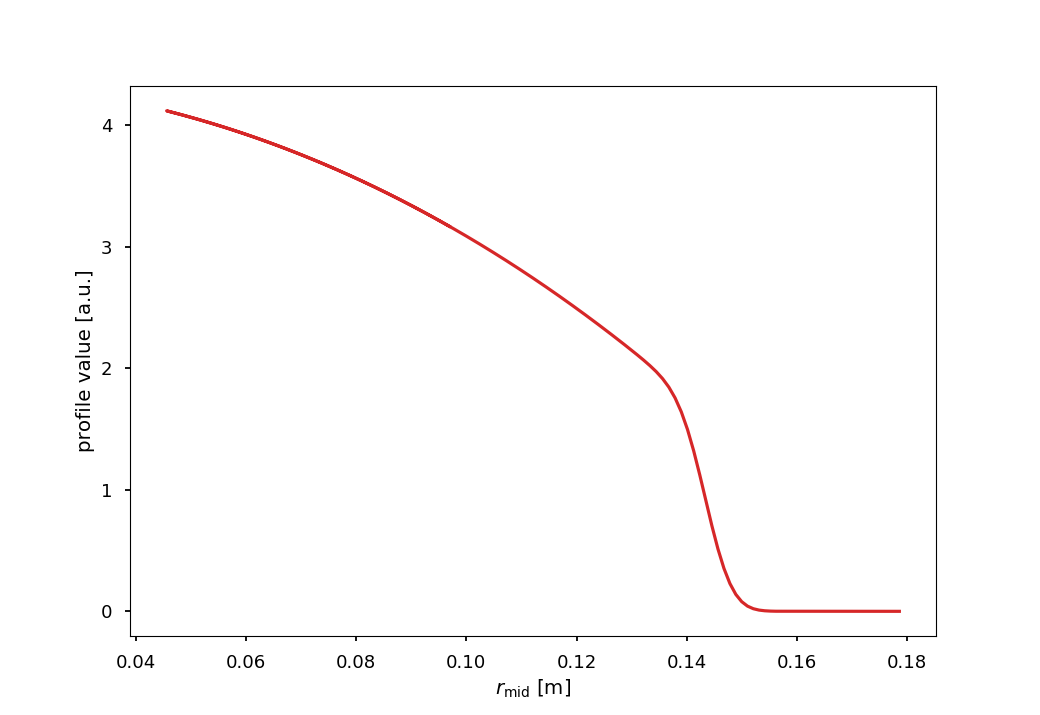

<IPython.core.display.Javascript object>


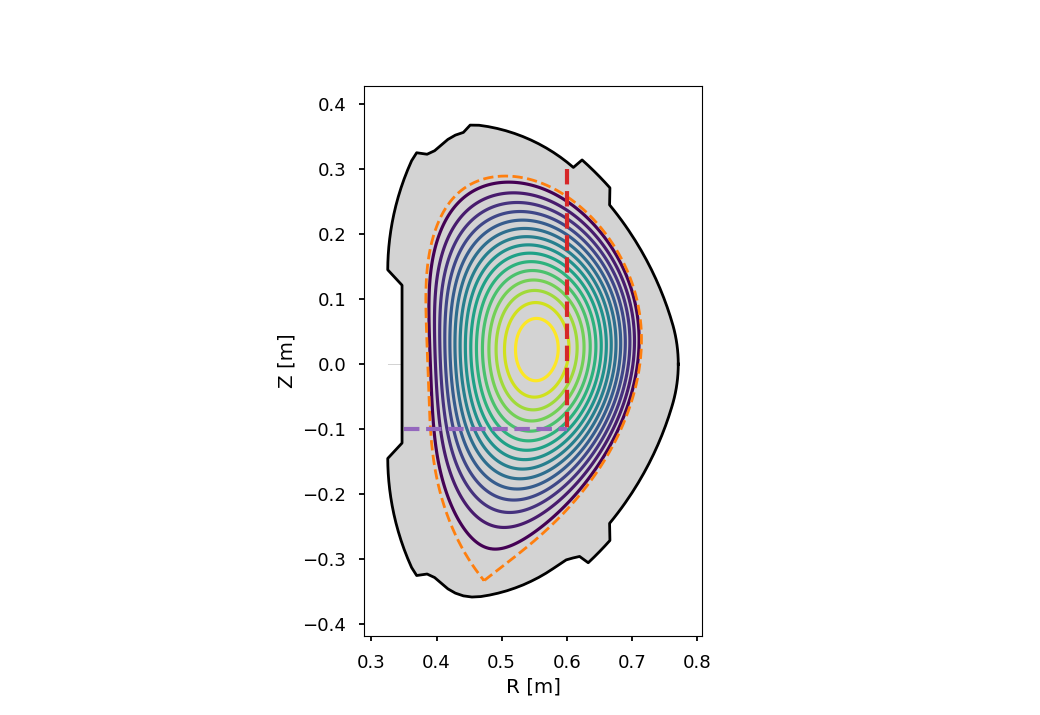

/sw/python2/anaconda3.5/lib/python3.5/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


In [109]:
from scipy.special import erf


N = 200

chord1 = eq.coordinates(R=0.6*np.ones(N), Z=np.linspace(0.3, -0.1, N))
chord2 = eq.coordinates(R=np.linspace(0.35, 0.6, 20), Z=-0.1*np.ones(20))


# let's define some testing profile function: 
prof_func = lambda x, k1, xsep: k1/4 * (1 + erf((x-xsep)*20))*np.log((x+1)*1.2)
chord_prof = prof_func(1 - chord1.psi_n, 10, 0.15)

# todo here
plt.figure()
plt.plot(chord1.Z, chord_prof, color='C3')
eq.fluxfuncs.add_flux_func('test_prof', chord_prof, chord1, spline_smooth=0)
plt.plot(chord1.Z, eq.fluxfuncs.test_prof(chord1), '--', color='C3')
plt.xlabel('Z [m]')
plt.ylabel('profile value [a.u.]')

save_it('profile_c1', 2)

plt.figure()
plt.plot(chord2.R, eq.fluxfuncs.test_prof(chord2), '--', color='C4')
plt.xlabel('R [m]')
plt.ylabel('profile value [a.u.]')

save_it('profile_c2', 2)

plt.figure()
plt.plot(chord1.r_mid, chord_prof, color='C3')
plt.xlabel(r'$r_\mathrm{mid}$ [m]')
plt.ylabel('profile value [a.u.]')

save_it('profile_r_mid', 2)

plt.figure()
eq._plot_overview()

chord1.plot(lw=3, ls='--', color='C3')
chord2.plot(lw=3, ls='--', color='C4')
save_it('profile_tokamak', 2)


## Some 3D

  nx = 65, ny = 129
197 1
--- No limiter specified. The IBA v3.1 limiter will be used.
---------------------------------
Equilibrium module initialization
---------------------------------
--- Generate 2D spline ---
--- Looking for extremes ---


<IPython.core.display.Javascript object>


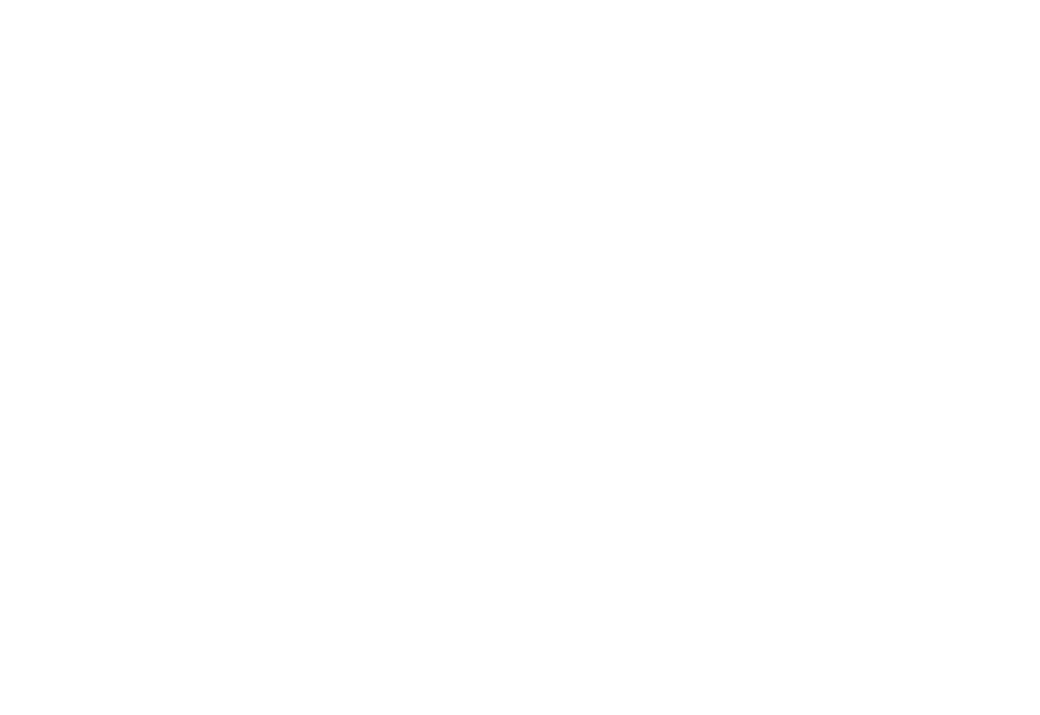

>>> lower x-point configuration found
--- Generate 1D splines ---
--- Mapping midplane to psi_n ---
--- Mapping pressure and f func to psi_n ---


In [110]:
eq = load_testing_equilibrium()

<IPython.core.display.Javascript object>


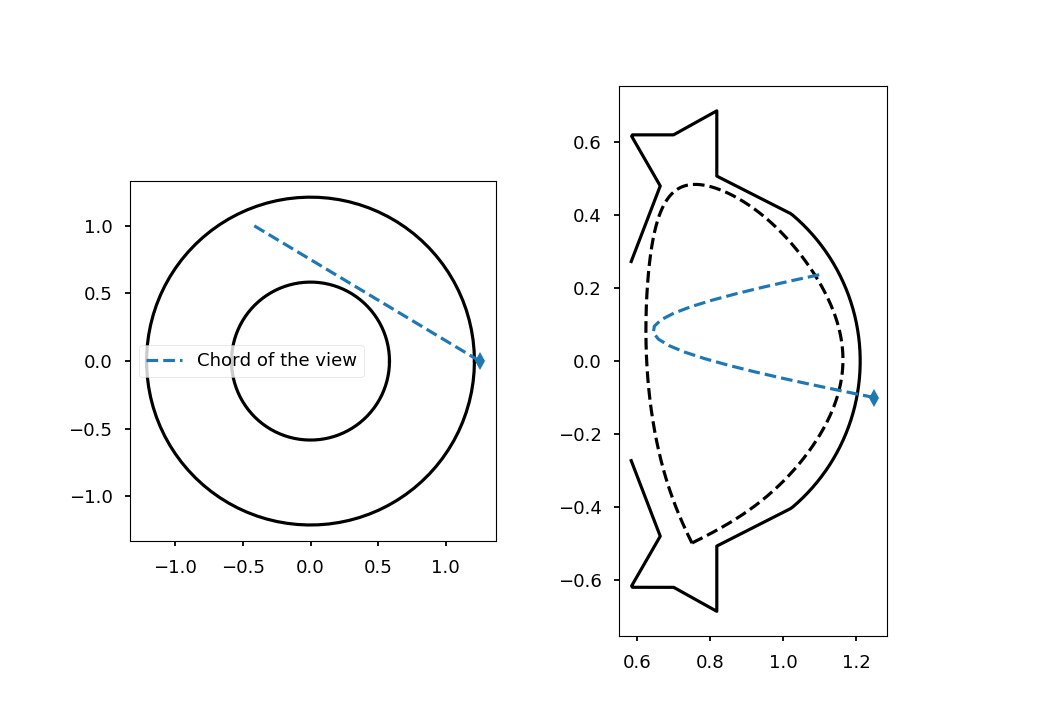

In [111]:
# Let's define some detector: 
# R = 1.25, Z = 0, phi = 0 pointing to (direction)
# x = -1, y = 0.5, z = 0

direction = np.array((-1, 0.6, 0.2))
direction /= np.linalg.norm(direction)
position = np.array((1.25, 0, -0.1))

# Let's define limiters: 
Ns = 100
inner_lim = eq.coordinates(np.min(eq.first_wall.R)*np.ones(Ns), np.zeros(Ns), np.linspace(0, 2*np.pi, Ns))
outer_lim = eq.coordinates(np.max(eq.first_wall.R)*np.ones(Ns), np.zeros(Ns), np.linspace(0, 2*np.pi, Ns))

# Line of view of the detector (i.e. camera pixel):
camera_view = eq.coordinates(position+direction[np.newaxis,:]*np.linspace(0, 2.0, 20)[:, np.newaxis], coord_type=('X', 'Y', 'Z'))

fig, axs = plt.subplots(1,2)
# Upper view:
ax = axs[0]
ax.plot(inner_lim.X, inner_lim.Y, 'k-')
ax.plot(outer_lim.X, outer_lim.Y, 'k-')
ax.plot(camera_view.X, camera_view.Y, 'x--', label='Chord of the view')
ax.plot(position[0], position[1], 'd', color='C0')
ax.legend()
ax.set_aspect('equal')

ax = axs[1]
ax.plot(eq.first_wall.R, eq.first_wall.Z, 'k-')
ax.plot(eq.lcfs.R, eq.lcfs.Z, 'k--')
ax.plot(camera_view.R, camera_view.Z, 'x--')
ax.plot(position[0], position[2], 'd', color='C0')
ax.set_aspect('equal')

save_it('profile_3d', 2)

## Field line tracing

  nx = 65, ny = 129
197 1
--- No limiter specified. The IBA v3.1 limiter will be used.
---------------------------------
Equilibrium module initialization
---------------------------------
--- Generate 2D spline ---
--- Looking for extremes ---


<IPython.core.display.Javascript object>


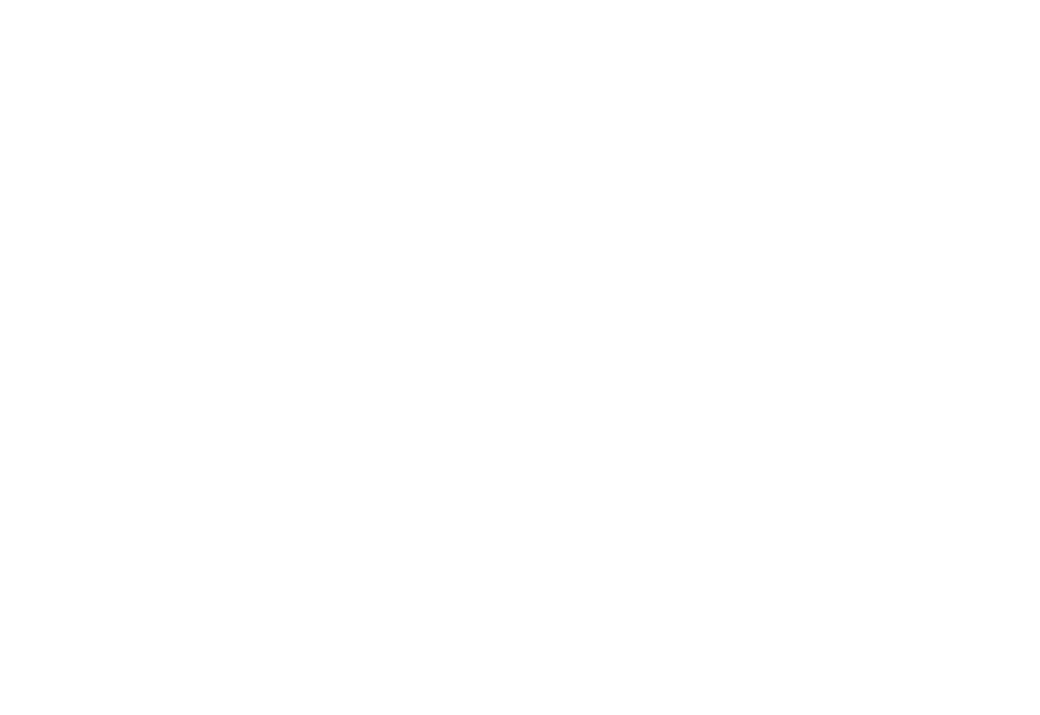

>>> lower x-point configuration found
--- Generate 1D splines ---
--- Mapping midplane to psi_n ---
--- Mapping pressure and f func to psi_n ---


In [114]:
eq = load_testing_equilibrium(1)
eq = eq_iter

machine = 'iter'

In [25]:
N = 5
#rs = np.linspace(0.7, 1.18, N, endpoint=True)
rs = np.linspace(8, 8.3, N, endpoint=True)
zs = np.zeros_like(rs)

traces = eq.trace_field_line(R=rs, Z=zs)

A termination event occurred., 8852
A termination event occurred., 10790
A termination event occurred., 14294
A termination event occurred., 3524
A termination event occurred., 2750


<IPython.core.display.Javascript object>


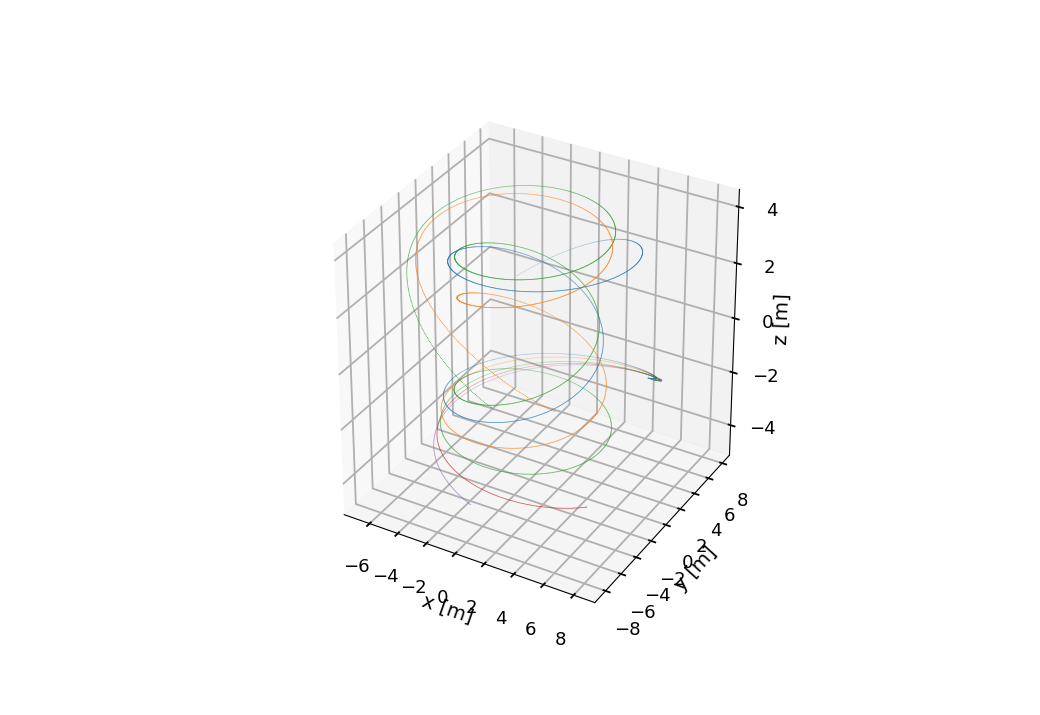

<IPython.core.display.Javascript object>


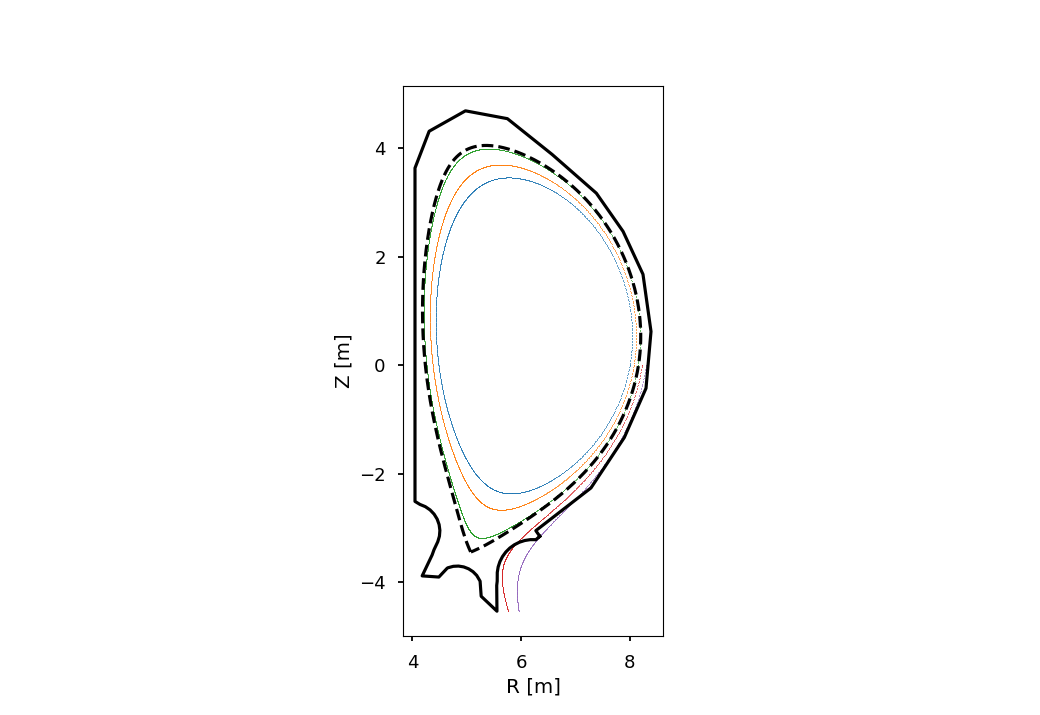

<IPython.core.display.Javascript object>


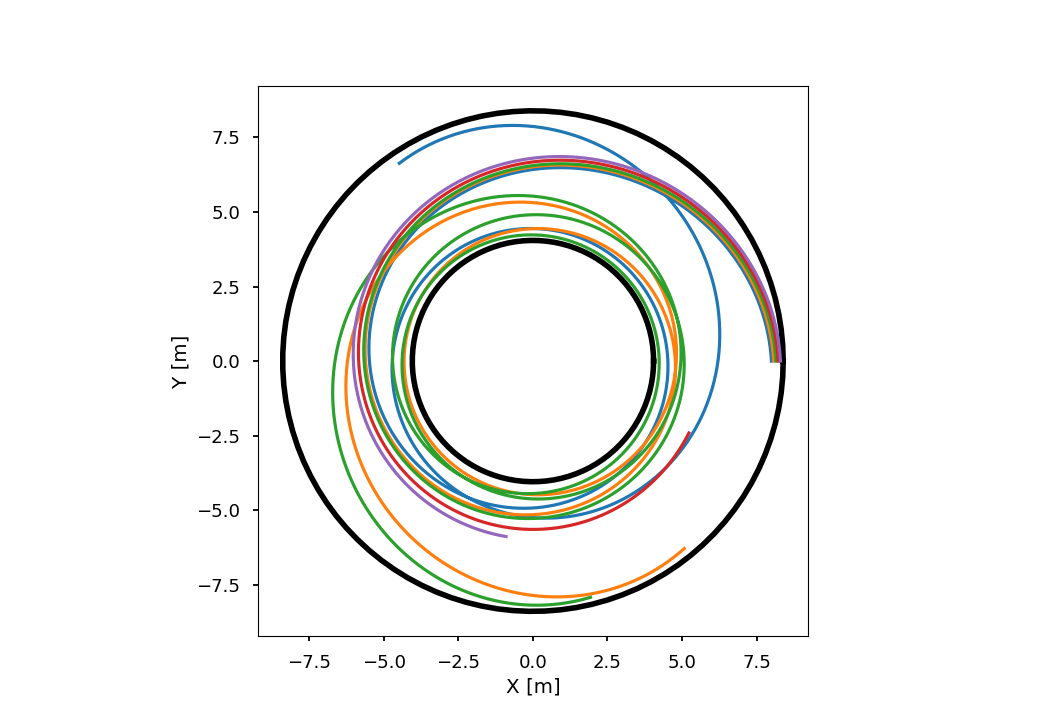

In [115]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.gca(projection='3d')

for fl in traces:
    ax.scatter(fl.X, fl.Y, fl.Z, s=0.3, marker='.')

ax.set_aspect('equal')
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_zlabel('z [m]')

save_it(machine+'_tracing_all_3d', 1)

fig = plt.figure()
ax = fig.gca()

ax.plot(eq.first_wall.R, eq.first_wall.Z, 'k-')
ax.plot(eq.lcfs.R, eq.lcfs.Z, 'k--')

for fl in traces:
    ax.scatter(fl.R, fl.Z, s=0.3, marker='.')

ax.set_xlabel('R [m]')
ax.set_ylabel('Z [m]')
ax.set_aspect('equal')

save_it(machine+'_tracing_all_rz', 1)

fig = plt.figure()
ax = fig.gca()

# Let's define limiters: 
Ns = 100
inner_lim = eq.coordinates(np.min(eq.first_wall.R)*np.ones(Ns), np.zeros(Ns), np.linspace(0, 2*np.pi, Ns))
outer_lim = eq.coordinates(np.max(eq.first_wall.R)*np.ones(Ns), np.zeros(Ns), np.linspace(0, 2*np.pi, Ns))

ax.plot(inner_lim.X, inner_lim.Y, 'k-', lw=4)
ax.plot(outer_lim.X, outer_lim.Y, 'k-', lw=4)

for fl in traces:
    ax.plot(fl.X, fl.Y)

ax.set_xlabel('X [m]')
ax.set_ylabel('Y [m]')
ax.set_aspect('equal')

save_it(machine+'_tracing_all_xy', 1)

<IPython.core.display.Javascript object>


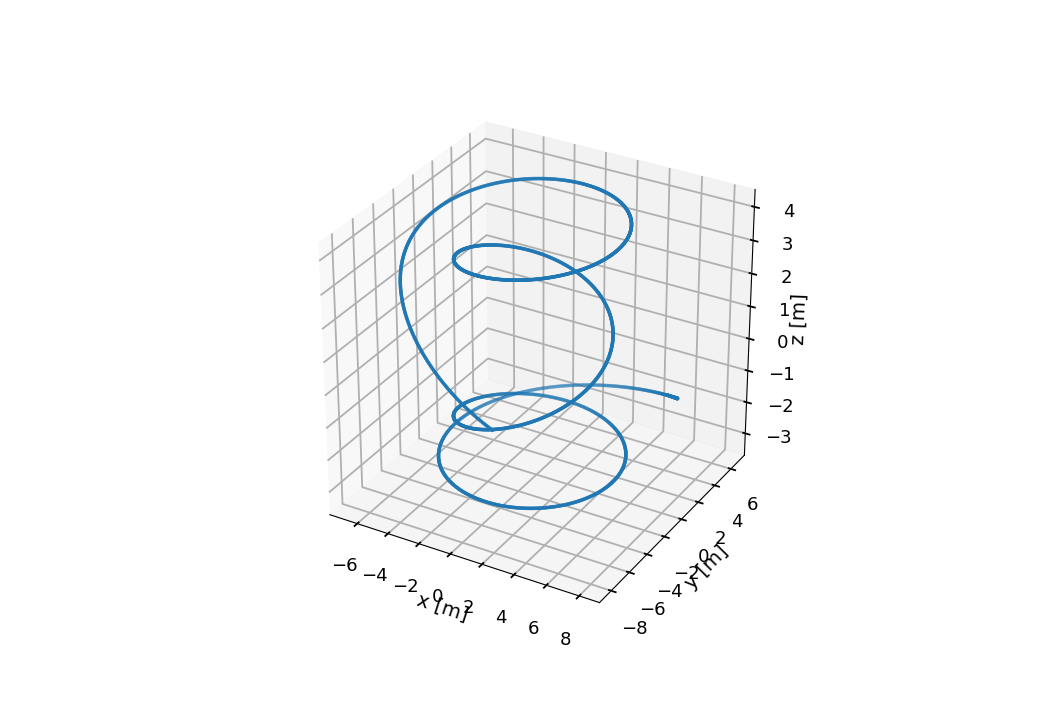

<IPython.core.display.Javascript object>


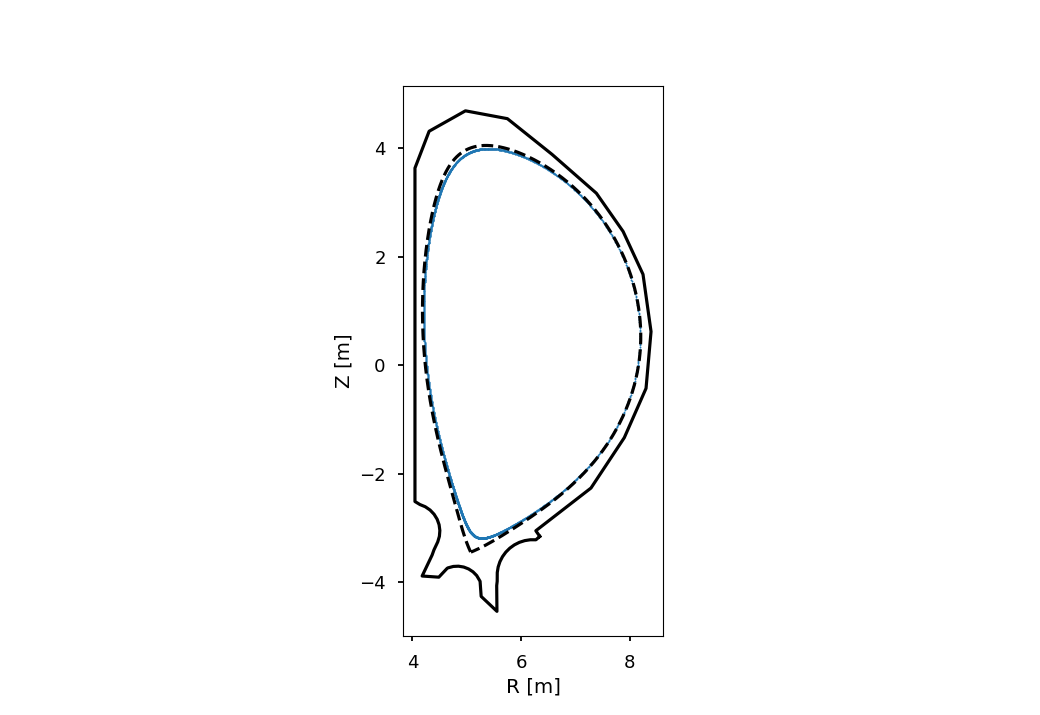

/sw/python2/anaconda3.5/lib/python3.5/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


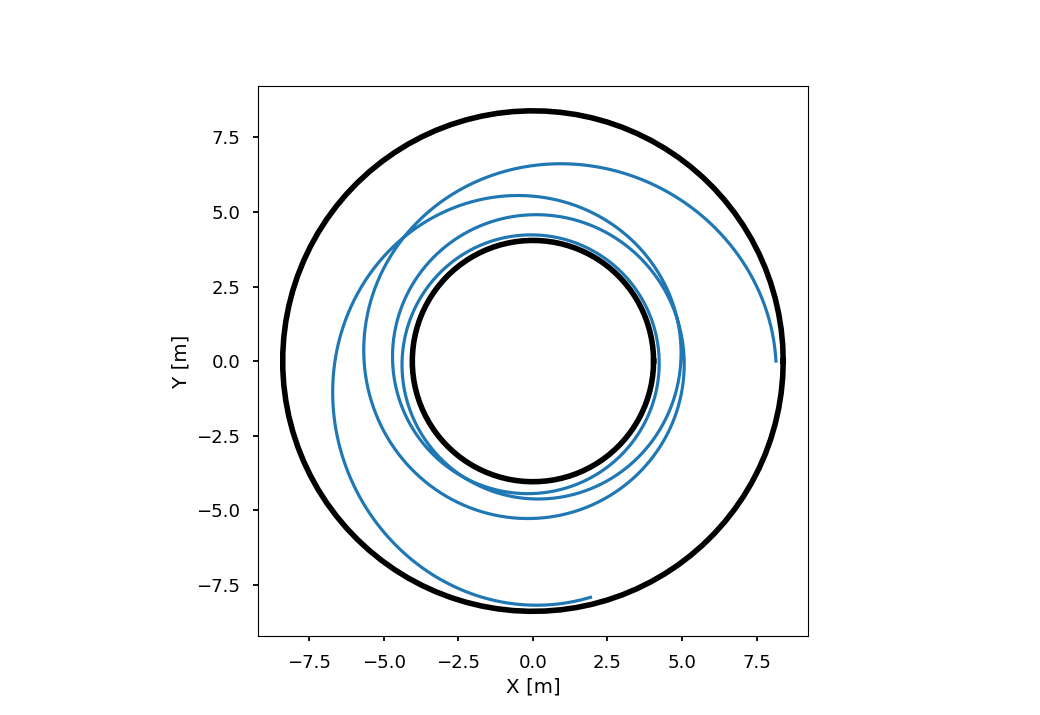

In [116]:
fig = plt.figure()
ax = fig.gca(projection='3d')

fl = traces[2]
ax.scatter(fl.X, fl.Y, fl.Z, marker='.')

ax.set_aspect('equal')
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_zlabel('z [m]')

save_it(machine+'_tracing_1_3d', 1)

fig = plt.figure()
ax = fig.gca()

ax.plot(eq.first_wall.R, eq.first_wall.Z, 'k-')
ax.plot(eq.lcfs.R, eq.lcfs.Z, 'k--')


ax.scatter(fl.R, fl.Z, s=3, marker='.')

ax.set_xlabel('R [m]')
ax.set_ylabel('Z [m]')
ax.set_aspect('equal')

save_it(machine+'_tracing_1_rz', 1)

fig = plt.figure()
ax = fig.gca()

# Let's define limiters: 
Ns = 100
inner_lim = eq.coordinates(np.min(eq.first_wall.R)*np.ones(Ns), np.zeros(Ns), np.linspace(0, 2*np.pi, Ns))
outer_lim = eq.coordinates(np.max(eq.first_wall.R)*np.ones(Ns), np.zeros(Ns), np.linspace(0, 2*np.pi, Ns))

ax.plot(inner_lim.X, inner_lim.Y, 'k-', lw=4)
ax.plot(outer_lim.X, outer_lim.Y, 'k-', lw=4)


ax.plot(fl.X, fl.Y)

ax.set_xlabel('X [m]')
ax.set_ylabel('Y [m]')
ax.set_aspect('equal')

save_it(machine+'_tracing_1_xy', 1)

/sw/python2/anaconda3.5/lib/python3.5/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


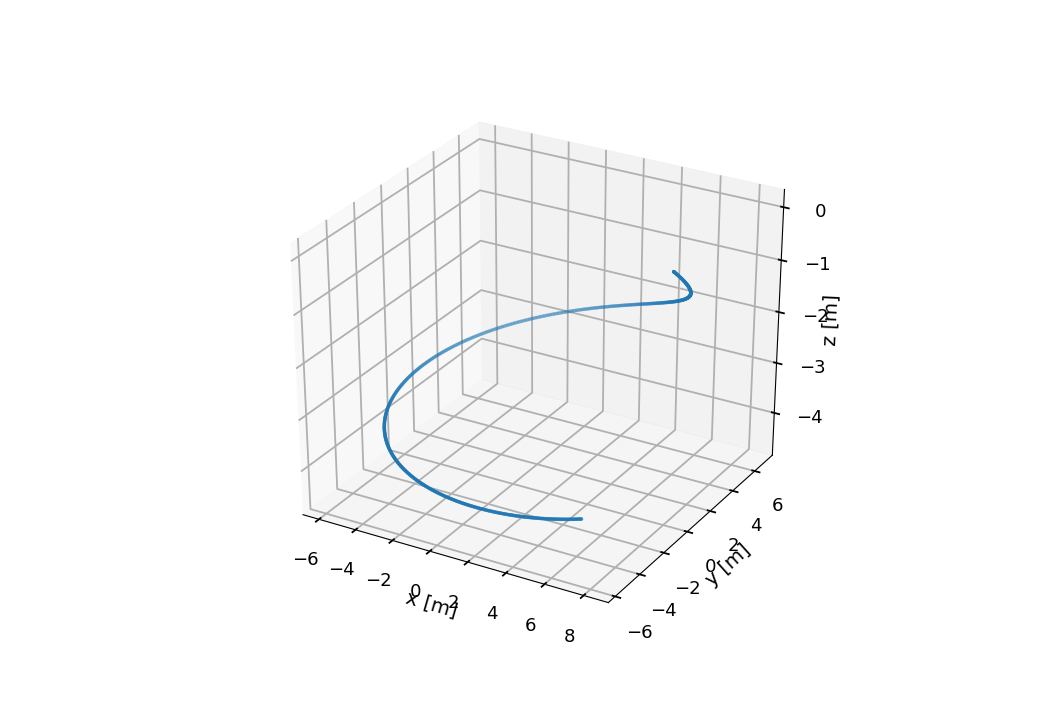

<IPython.core.display.Javascript object>


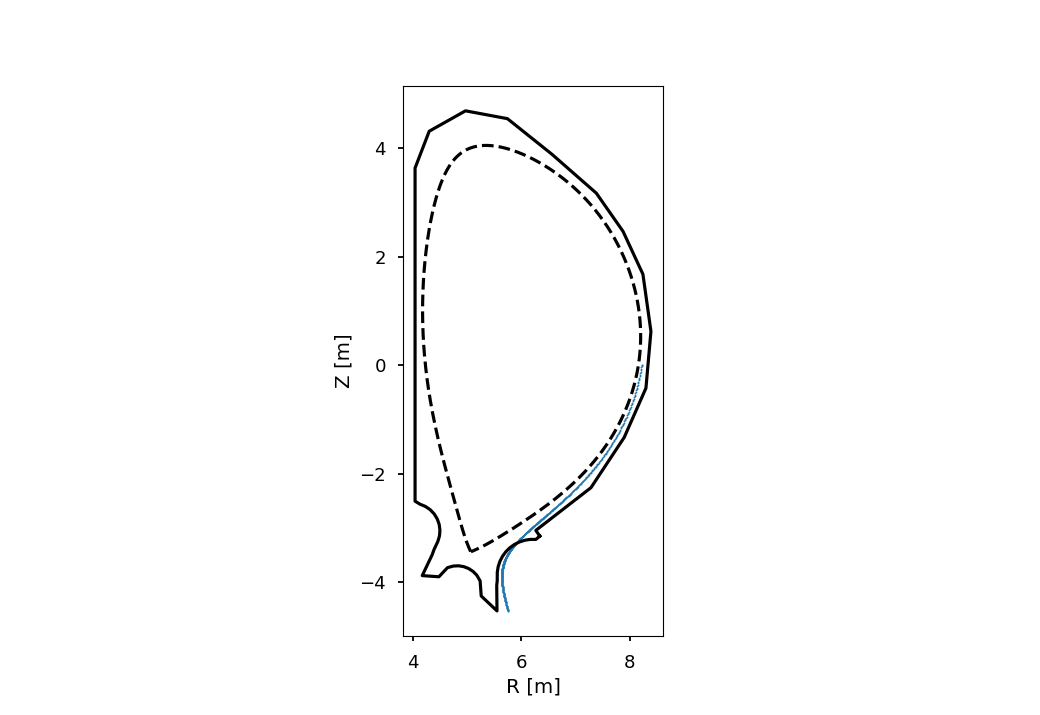

<IPython.core.display.Javascript object>


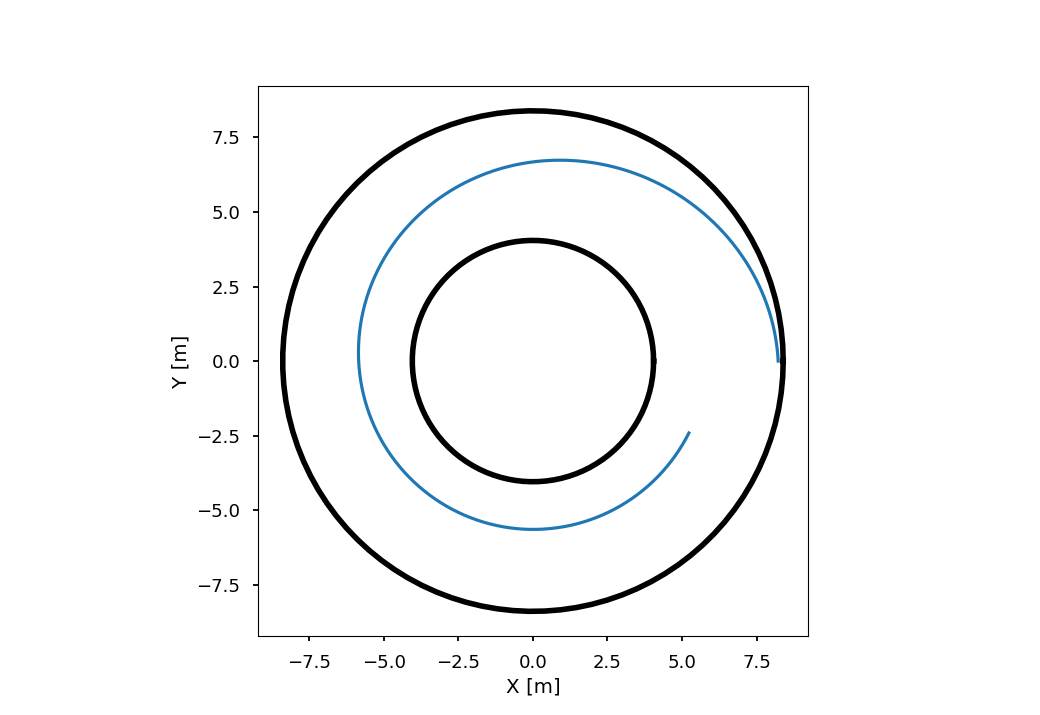

In [117]:
fig = plt.figure()
ax = fig.gca(projection='3d')

fl = traces[-2]
ax.scatter(fl.X, fl.Y, fl.Z, marker='.')

ax.set_aspect('equal')
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_zlabel('z [m]')

save_it(machine+'_tracing_1_3d', 2)

fig = plt.figure()
ax = fig.gca()

ax.plot(eq.first_wall.R, eq.first_wall.Z, 'k-')
ax.plot(eq.lcfs.R, eq.lcfs.Z, 'k--')


ax.scatter(fl.R, fl.Z, s=3, marker='.')

ax.set_xlabel('R [m]')
ax.set_ylabel('Z [m]')
ax.set_aspect('equal')


save_it(machine+'_tracing_1_rz', 2)
fig = plt.figure()
ax = fig.gca()

# Let's define limiters: 
Ns = 100
inner_lim = eq.coordinates(np.min(eq.first_wall.R)*np.ones(Ns), np.zeros(Ns), np.linspace(0, 2*np.pi, Ns))
outer_lim = eq.coordinates(np.max(eq.first_wall.R)*np.ones(Ns), np.zeros(Ns), np.linspace(0, 2*np.pi, Ns))

ax.plot(inner_lim.X, inner_lim.Y, 'k-', lw=4)
ax.plot(outer_lim.X, outer_lim.Y, 'k-', lw=4)


ax.plot(fl.X, fl.Y)

ax.set_xlabel('X [m]')
ax.set_ylabel('Y [m]')
ax.set_aspect('equal')

save_it(machine+'_tracing_1_xy', 2)